In [1]:
## Teste - Ciência de Dados / Otimização e Pesquisa Operacional (Short Track)

#Teste técnico para nossas posições em Ciência de Dados (short track)

#O seguinte teste tem por premissa ser um problema base (Ref. <a href="https://teaching.cornell.edu/teaching-resources/engaging-students/problem-based-learningproblem">problem based learning</a>) de modo que você pode usá-lo como achar adequado tendo em vista a demonstração de seus conhecimentos técnicos.

#Queremos entender melhor seu jeito de atacar problemas desafiadores em amostras de mundo real, além de que, do modo que está estruturada, a entrega, apesar de rápida, nos permite verificar mais detalhes de seu perfil profissional tais como organização, pontualidade e percepção quanto a suas skills de data wrangling, validação e governança e programação Python. Recomendamos ainda que o teste seja feito em no máximo 6 horas (não se preocupe em respostas muito detalhadas ou em complexidades que simplesmente não funcionariam no mundo real!).

#As entregas devem ser via envio de link para um github público (ou similar) o qual contenha sua solução para o cenário a seguir. Favor não citar a Lambda3 em seu repositório.

In [2]:
## Cenário I

#No seguinte cenário você é a pessoa cientista de dados por trás de um projeto de analytics junto a uma grande indústria norte-americana.

#Os dados a serem ingeridos e analisados em nossa plataforma de Big Data são dados de compras (orders), pessoas (people) e devoluções (returns).

#Sua primeira tarefa, a partir desse cenário, deve ser um relatório (de preferência um <a href="https://jupyter.org/">jupyter notebook</a> ou <a href="https://colab.research.google.com/">colab notebook</a> relatando algumas das anomalias encontradas e investigações possíveis (falamos que aqui encorajamos gente curiosa, certo?!)

#O dataset a ser utilizado nesse cenário (.zip com arquivo CSV) você encontra <a href="https://drive.google.com/file/d/1a8UCbzXFbqTQi0x8tqCXPRTlB--E7o8I/view?usp=sharing">aqui</a>.

#Temos um apreço muito grande por qualidade e disponibilidade. Sendo assim, é bom contarmos com métricas para nos previnir e alertar sobre quaisquer problemas bem como metrificar e monitorar as arquitetura proposta. Logo, apreciamos se você conseguir entregar testes que mensurem a qualidade dos dados junto à sua solução desse primeiro entregável.                                           

In [3]:
## ------- Resposta Cenário I ------- ##
# investigação!

In [29]:
#importando bibliotecas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

In [41]:
import os
print(os.getcwd())
df = pd.read_excel(r'C:\Users\Samuel\Documents\GitHub\Teste-Cientista-de-Dados-\sample.xls')
#r'C:\Users\Samuel\Documents\GitHub\Teste-Cientista-de-Dados-\sample.xls

C:\Users\Samuel


In [40]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [300]:
n_col = df.shape[1]
n_lin = df.shape[0]
print('nº colunas:', n_col)
print('nº linhas:', n_lin)

nº colunas: 21
nº linhas: 9994


In [301]:
np.sum(df.isnull()) == 0 #as colunas estão completas? (se estiverem-> True, se estiverem com valores faltando->False)

Row ID           True
Order ID         True
Order Date       True
Ship Date        True
Ship Mode        True
Customer ID      True
Customer Name    True
Segment          True
Country          True
City             True
State            True
Postal Code      True
Region           True
Product ID       True
Category         True
Sub-Category     True
Product Name     True
Sales            True
Quantity         True
Discount         True
Profit           True
dtype: bool

In [302]:
# Não há dados faltando! (milagre)

In [303]:
#verificando unicidade de Row ID, Order ID e Product ID

In [304]:
bool_RowID = df['Row ID'].duplicated().any()
bool_OrderID = df['Order ID'].duplicated().any()
bool_ProdID = df['Product ID'].duplicated().any()
print('existem duplicadas em Row ID: ', bool_RowID)
print('existem duplicadas em Order ID: ', bool_OrderID)
print('existem duplicadas em Product ID: ', bool_ProdID)

existem duplicadas em Row ID:  False
existem duplicadas em Order ID:  True
existem duplicadas em Product ID:  True


In [305]:
# O indíce 'Row ID' é único e o Product ID não, o que faz sentido. Curioso é não haverem Ordens unicas (Order ID) o que pode representar uma inconstencia nos dados
# Customer ID podem existir duplicadas então, não a coloquei nessa abordagem

In [306]:
#verificando período dos dados
Order_Date_mais_antiga = min(df['Order Date'])
Order_Date_mais_recente = max(df['Order Date'])
Ship_Date_mais_antiga = min(df['Ship Date'])
Ship_Date_mais_recente = max(df['Ship Date'])
print('Oldest Order Date: ', Order_Date_mais_antiga)
print('Youngest Order Date: ', Order_Date_mais_recente)
print('')
print('Oldest Ship Date: ', Ship_Date_mais_antiga)
print('Youngest Ship Date: ', Ship_Date_mais_recente)

Oldest Order Date:  2014-01-03 00:00:00
Youngest Order Date:  2017-12-30 00:00:00

Oldest Ship Date:  2014-01-07 00:00:00
Youngest Ship Date:  2018-01-05 00:00:00


<AxesSubplot:xlabel='Order Date'>

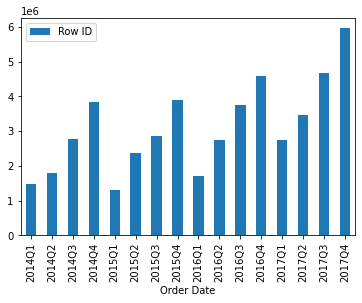

In [307]:
# Distribuição de Ordens ao longo do ano - quadrimestes (fim de ano bomba!)
df1 = df[['Row ID', 'Order Date']]
df1 = df1.groupby(df['Order Date'].dt.to_period('Q')).sum()
df1.plot(kind='bar')

<AxesSubplot:xlabel='Ship Date'>

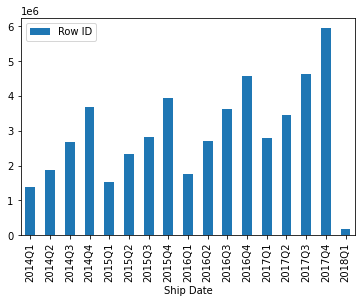

In [308]:
# Distribuição de Entregas ao longo do ano - quadrimestes (fim de ano bomba!-> como esperado, bem similar ao de ordens)
df2 = df[['Row ID', 'Ship Date']]
df2 = df2.groupby(df['Ship Date'].dt.to_period('Q')).sum()
df2.plot(kind='bar')

In [309]:
# Agora farei uma análise visual das variáveis categoricas, assim fica explicito o que é mais ou menos relevante dentro de cada categoria!
# Ao mesmo tempo, ficará claro se houver alguma informação distoante que se mostre relevante, como categorias "NaN" relevantes ou ausencia de padronização

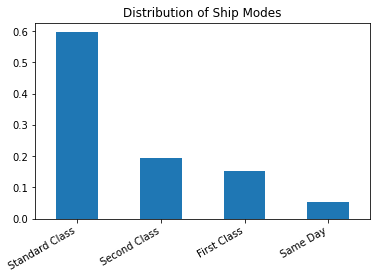

In [310]:
#analisando variáveis categoricas: Ship Mode
Ship_mode = df['Ship Mode'].value_counts()
(Ship_mode/n_lin).plot(kind='bar')
plt.title('Distribution of Ship Modes')
plt.gcf().autofmt_xdate()

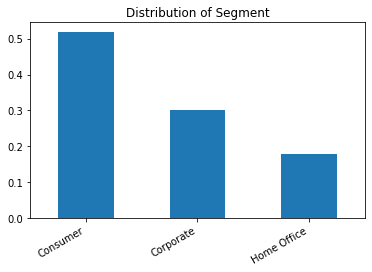

In [15]:
#analisando variáveis categoricas: Segment
Segment = df['Segment'].value_counts()
(Segment/n_lin).plot(kind='bar')
plt.title('Distribution of Segment')
plt.gcf().autofmt_xdate()

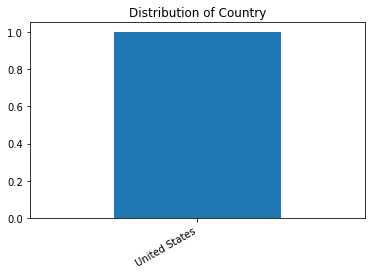

In [16]:
#analisando variáveis categoricas: Ship Mode
Country = df['Country'].value_counts()
(Country/n_lin).plot(kind='bar')
plt.title('Distribution of Country')
plt.gcf().autofmt_xdate()

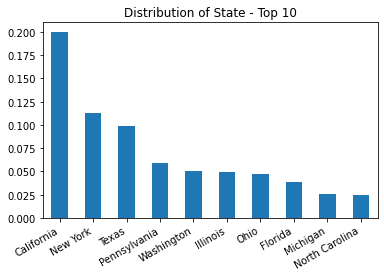

In [17]:
#analisando variáveis categoricas: State - top 10
State = df['State'].value_counts()
State_max_10 = State.sort_values(ascending=False).head(10)
(State_max_10/n_lin).plot(kind='bar')
plt.title('Distribution of State - Top 10')
plt.gcf().autofmt_xdate()


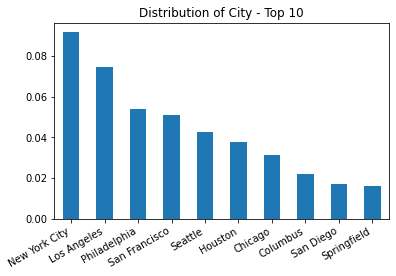

In [18]:
#analisando variáveis categoricas: City - top 10
City = df['City'].value_counts()
City_max_10 = City.sort_values(ascending=False).head(10)
(City_max_10/n_lin).plot(kind='bar')
plt.title('Distribution of City - Top 10')
plt.gcf().autofmt_xdate()


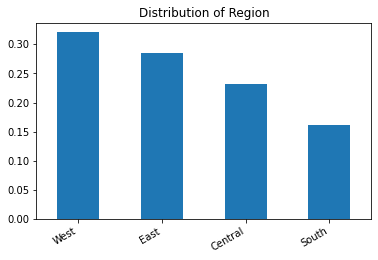

In [19]:
#analisando variáveis categoricas: Region
Region = df['Region'].value_counts()
(Region/n_lin).plot(kind='bar')
plt.title('Distribution of Region')
plt.gcf().autofmt_xdate()

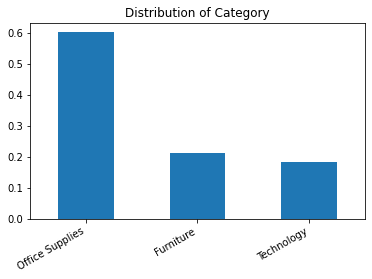

In [20]:
#analisando variáveis categoricas: Category
Category = df['Category'].value_counts()
(Category/n_lin).plot(kind='bar')
plt.title('Distribution of Category')
plt.gcf().autofmt_xdate()

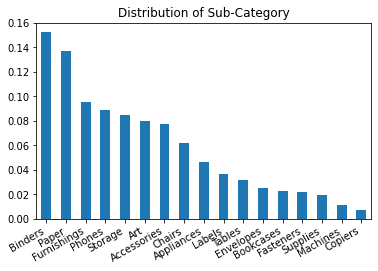

In [21]:
#analisando variáveis categoricas: Category
Sub_Category = df['Sub-Category'].value_counts()
(Sub_Category/n_lin).plot(kind='bar')
plt.title('Distribution of Sub-Category')
plt.gcf().autofmt_xdate()

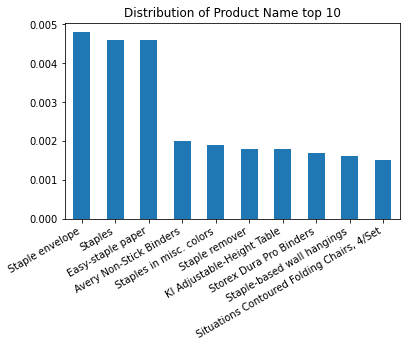

In [22]:
#analisando variáveis categoricas: Product Name - top 10
Product_Name = df['Product Name'].value_counts()
Product_Name_max_10 = Product_Name.sort_values(ascending=False).head(10)
(Product_Name_max_10/n_lin).plot(kind='bar')
plt.title('Distribution of Product Name top 10')
plt.gcf().autofmt_xdate()

In [23]:
#Verifica-se que não existe padronização na forma de nomear os produtos, alguns contendo até datas

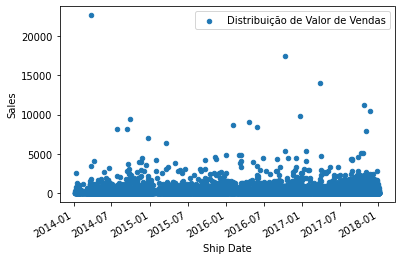

In [24]:
#Variáveis quantitativas: distribuição das vendas 

df.plot.scatter(x='Ship Date', y='Sales', label="Distribuição de Valor de Vendas")
plt.gcf().autofmt_xdate()

In [25]:
#Verifica-se a presença de alguns outliers nas vendas

<AxesSubplot:title={'center':'Row ID'}, xlabel='Quantity'>

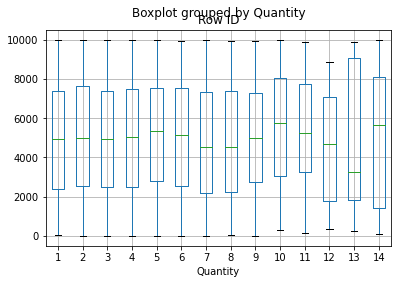

In [26]:
#Variáveis quantitativas: distribuição das quantidades

df.boxplot(column=["Row ID"], by="Quantity")

In [27]:
#Parece consistente 

<AxesSubplot:title={'center':'Row ID'}, xlabel='Discount'>

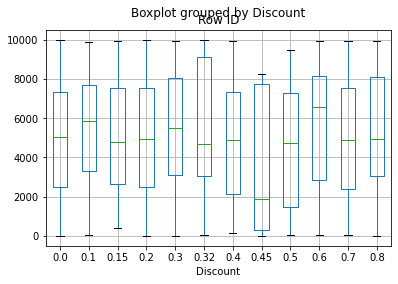

In [28]:
#Variáveis quantitativas: distribuição dos Descontos

df.boxplot(column=["Row ID"], by="Discount")

In [29]:
#Parece consistente, apesar da média de 45% de desconto estar deslocada em relação as demais

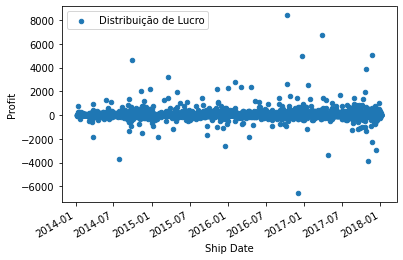

In [30]:
#Variáveis quantitativas: distribuição das quantidades

df.plot.scatter(x='Ship Date', y='Profit', label="Distribuição de Lucro")
plt.gcf().autofmt_xdate()

In [31]:
# Verifica-se pontos de atençao com alguns outliers positivos e negativos em relação aos lucros

In [32]:
# Verificou-se algumas anomalias em relação a dados de Profit (Lucro), Sales (Vendas), Product Name(Nome de produto) e ao Order Id.
# Além disso, a plotagem das variáveis permitiu de forma rápida uma possivel identificação de outliers e o entendimento do comportamento das variáveis
# Algumas variáveis categoricas não eram tão relevantes em relação ao problema, mas eram de fácil plotagem por isso as fiz também (afinal, é bom ser curioso não é?)

In [33]:
## Cenário II

# O segundo entregável consiste na transformação de dados disponíveis em <a href="https://drive.google.com/file/d/1IDCjpDZh5St97jw4K_bAewJ8hf-rax9C/view?usp=sharing">arquivo Json</a> 
# para o formato de dataframe, algo comum no dia a dia da empresa. 
# Após transformar esse Json em dataframe é possível perceber que a coluna "item_list" está como dicionário. 
# Seu gestor pediu dois pontos de atenção nessa tarefa:

# - Expandir a coluna num mesmo dataframe;
# - Normalizar os itens dessa coluna de dicionário e dividí-los em dois dataframes separados, seguindo o modelo relacional.

In [34]:
## ------- Resposta Cenário II ------- ##


In [35]:
data = pd.read_json(r'C:\Users\Samuel\Documents\GitHub\Teste-Cientista-de-Dados-\data.json')
data.head()

CreateDate         EmissionDate  Discount  NFeNumber  NFeID  \
0  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        501      1   
1  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        502      2   
2  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        503      3   

                                            ItemList  
0  [{'ProductName': 'Rice', 'Value': 35.55, 'Quan...  
1  [{'ProductName': 'Tomate', 'Value': 12.25, 'Qu...  
2  [{'ProductName': 'Beer', 'Value': 9.0, 'Quanti...

In [36]:
#Expandindo e normalizando num mesmo dataframe!

data2 = data.explode('ItemList')
data2 = pd.concat([data2.drop(['ItemList'], axis=1), data2['ItemList'].apply(pd.Series)], axis=1)
data2 = data2.reset_index()
print(data2)

   index              CreateDate         EmissionDate  Discount  NFeNumber  \
0      0  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        501   
1      0  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        501   
2      0  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        501   
3      1  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        502   
4      1  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        502   
5      2  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        503   
6      2  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        503   
7      2  2021-05-24T20:21:34.79  2021-05-24T00:00:00         0        503   

   NFeID   ProductName  Value  Quantity  
0      1          Rice  35.55         2  
1      1         Flour  11.55         5  
2      1          Bean  27.15         7  
3      2        Tomate  12.25        10  
4      2         Pasta   7.55         5  
5      3          Beer   9.00         6  
6  

In [317]:
# Dividindo em dois dataframes 
# Não ficou muito claro em qual o tipo de relação que devo estabelecer para o modelo relacional citado então vou dividir tendo o NFeID como indexador

dataframe1 = data[['CreateDate', 'EmissionDate', 'Discount', 'NFeNumber', 'NFeID' ]]

dataframe2 = data2[['NFeID', 'ProductName', 'Value', 'Quantity']]

print(dataframe2)




   NFeID   ProductName  Value  Quantity
0      1          Rice  35.55         2
1      1         Flour  11.55         5
2      1          Bean  27.15         7
3      2        Tomate  12.25        10
4      2         Pasta   7.55         5
5      3          Beer   9.00         6
6      3  French fries  10.99         2
7      3     Ice cream  27.15         1


In [38]:
## Cenário III

# O Problema do Caixeiro Viajante (Traveling Salesperson - TSP) é um dos mais famosos problemas de otimização combinatória. 
# Este problema é muito fácil de explicar, mas muito complicado de resolver - mesmo para casos com um pequeno número de cidades.

# A origem do problema do caixeiro viajante não é muito clara; 
# ele chega a ser mencionado em um manual de 1832 para caixeiros-viajantes,
# que incluía exemplos de passeios por 45 cidades alemãs, mas não foi formulado originalmente como um problema matemático.
# No entanto, em 1800, os matemáticos William Rowan Hamilton e Thomas Kirkman criaram formulações matemáticas do problema.

# O TSP pode ser definido da seguinte forma: para uma determinada lista de cidades e as distâncias entre cada par delas, 
# queremos encontrar a rota mais curta possível, que vai a cada cidade uma vez e retorna à cidade de origem.

# Existe uma classe de Problemas de Pessoa Caixeira Viajante que assume que a distância de ir da cidade $ i $ 
# à cidade $ j $ é a mesma que ir da cidade $ j $ à cidade $ i $, este tipo de TSP também é conhecido como TSP simétrico. 
# Para o seguinte cenário sugerimos usar distâncias euclidianas, mas a formulação do modelo TSP é válida independentemente 
# da forma como as distâncias individuais são determinadas.

# A programação matemática é uma abordagem declarativa em que o modelador formula um modelo de otimização matemática 
# que captura os principais aspectos de um problema de decisão complexo. 

# Um modelo de otimização matemática tipicamente vai possuir cinco componentes, a saber:

# * Conjuntos e índices;
# * Parâmetros;
# * Variáveis ​​de decisão;
# * Função (ões) objetivo (s);
# * Quaisquer restrições.

# Como entregável, a indústria necessita de uma formulação de TSP que identifique a rota mais curta para as capitais 
# brasileiras, que vai a todas as cidades uma vez e retorna à cidade de origem 
#(os arquivos a serem utilizados, contendo os dados das capitais brasileiras a serem utilizados nesse cenário, você encontra 
# <a href="https://drive.google.com/drive/folders/1pip1P29vKGYWUOSD0hVrdNLNQcGzG3eN?usp=sharing">aqui</a>)

# states_coords.csv: contém a latitude e longitude de cada capital de estado brasileiro;
# states_line.json: contém o nome dos estados e a distância em km de todos os pares possíveis assumindo uma linha conectando as cidades;
# states_gmaps.json: contém o nome dos estados e a distância em km de todos os pares possíveis com as informações do Google a respeito.

In [39]:
## ------- Resposta Cenário III ------- ##


In [40]:
# Sobre o problema

# Apesar de a simetria entre idas e voltas entre cada cidade reduzir pela metade o número de rotas, 
# o modelo em questão cresce de forma fatorial, e como estamos lidando com uma quantidade grande de cidades, 
# o método de verificação uma a uma tende a se tornar inviável para o escopo de processamento desse exercício. 
# Dessa forma, verificarei rotas a partir dos vizinhos mais próximos e compararei as rotas obtidas entre as 26 cidades para achar qual delas é a menor.
# Como a rota é circular, a menor das rotas entre as 26 rotas poderá ser utilizada para partir para qualquer cidade, basta respeita a ordem desta.

In [285]:
# lendo dados

states_coords = pd.read_csv(r'C:\Users\Samuel\Documents\GitHub\Teste-Cientista-de-Dados-\states_coords.csv')
states_line = pd.read_csv(r'C:\Users\Samuel\Documents\GitHub\Teste-Cientista-de-Dados-\states_line.csv')
states_gmaps = pd.read_csv(r'C:\Users\Samuel\Documents\GitHub\Teste-Cientista-de-Dados-\states_gmaps.csv')

#states_coords.head()
#states_line.head()
print(states_line.head())

     São Paulo  Rio de Janeiro  Minas Gerais  Rio Grande do Sul   Pernambuco  \
0     0.000000      354.557321    492.561745         852.763702  2126.951268   
1   354.557321        0.000000    342.337926        1121.072276  1875.035468   
2   492.561745      342.337926      0.000000        1344.567917  1635.086515   
3   852.763702     1121.072276   1344.567917           0.000000  2975.531406   
4  2126.951268     1875.035468   1635.086515        2975.531406     0.000000   

         Ceará        Bahia       Paraná         Pará        Goiás  ...  \
0  2366.805644  1457.532585   342.443520  2467.265855   810.258174  ...   
1  2190.647081  1215.465687   677.792623  2455.146750   938.003328  ...   
2  1888.834505   965.600360   826.013748  2113.032483   670.440922  ...   
3  3212.503748  2306.960107   547.212395  3194.128093  1495.239654  ...   
4   629.108539   669.488856  2460.033424  1673.663528  1833.172567  ...   

       Paraíba        Piauí  Mato Grosso  Mato Grosso do Sul      Se

In [266]:
# usarei os dados do states_line pois estão mais completos


In [283]:
#variaveis iniciais
df = states_line.copy(deep=True)
df2 = states_line.copy(deep=True)
cidades_list = df.columns
n = cidades_list.shape[0] - 1 
 
cidades = pd.DataFrame({'cidades':cidades_list})
lista=[]

#criando uma rota tendo cada cidade como origem 
n0 = 0
while n0 <= n:
    dist_total = 0
    index_origem = n0
    cidade_origem = cidades.iloc[index_origem][0]
    rota = cidade_origem

    #criando a rota a partir do vizinho mais próximo
    i=0
    while i < n:    
        #selecionando coluna de origem da viagem 
        coluna_destino = df2[df2.columns[index_origem]]

        #escolhendo menor valor maior que 0, menor distancia positiva das opções (vizinho mais próximo)
        distancia = min(j for j in coluna_destino if j > 0)
        index_destino = np.where(coluna_destino == distancia)[0][0]
        cidade_destino = cidades.iloc[index_destino][0]

        #adicionando dados do vizinho mais proximo
        rota = rota+' - '+cidade_destino
        dist_total = dist_total + distancia

        #zerando linha da cidade origem
        df2.iloc[[index_origem]]=0
        #cidade de destino vira cidade de origem
        cidade_origem = cidade_destino
        index_origem = index_destino
        #contador recebe +1
        i+=1
    #adicionando a rota da volta a cidade de origem
    distancia = df.iloc[n0,index_origem]
    cidade_destino = cidades.iloc[n0][0]
    rota = rota+' - '+cidade_destino
    dist_total = dist_total + distancia

    #juntando os dados dessa rota a uma lista
    lista.append({'rota': rota, 'distancia': dist_total})
    df2 = states_line.copy(deep=True)
    n0+=1
#convertendo lista em Dataframe com todas as rotas começando em cada cidade
rotas_df= pd.DataFrame(lista,columns=['rota','distancia'])

#escolhendo a melhor rota, que servirá para qualquer cidade
rota_otimizada = rotas_df.min(axis=0)


In [295]:
print('Rota otimizada: ')
print(rota_otimizada[0])
print('')
print('Distância total (km): ')
print(rota_otimizada[1])

Rota otimizada: 
Acre - Rondônia - Amazonas - Roraima - Amapá - Pará - Maranhão - Piauí - Ceará - Rio Grande do Norte - Paraíba - Pernambuco - Alagoas - Sergipe - Bahia - Espírito Santo - Minas Gerais - Rio de Janeiro - São Paulo - Paraná - Santa Catarina - Rio Grande do Sul - Mato Grosso do Sul - Mato Grosso - Goiás - Tocantins - Acre

Distância total (km): 
14138.226499332766


In [ ]:
## Entregáveis

Já o quarto entregável pode estar contido como comentários em suas soluções prévias, queremos entender melhor como foi seu processo de solução de problemas, quais as hipóteses levantadas e, se tivesse mais tempo, como você poderia melhorar a implementação proposta.

Ou seja, temos quatro entregáveis:

- Relatório com exemplos de anomalias encontradas e possibilidades dentro da sua experiência e com relação aos dados da base;
- Resolução de problema de transformação de dados (NF-e);
- TSP (Traveling Salesperson Problem) resolvido para as capitais brasileiras;
- Comentários a respeito da implementações propostas e melhorias (desenvolvimento incremental).

In [ ]:
# gostei dos exercícios, foram legais de se fazer e pensar
# acabei não definindo funções porque achei os códigos pequenos, mas acho que poderia ter implementado nos gráficos e na última questão para poupar umas linhas e deixar mais enxuto
# a parte relacional da segunda questão me pareceu bem em aberto então escolhi dois dataframes que tem relação por meio do NFeID
# se tivesse mais tempo acredito que poderia achar relações entre variáveis significativas na primeira questão, verificar dados estatísticos das variáveis e colocar cor nos gráficos
# se tivesse mais tempo poderia estudar outras formas de otimização e fazer um comparativo de resultados entre elas na última questão

# acredito que comentei bastante durante as questões, mas qualquer dúvida é só me avisar!

In [ ]:
## Dados

| Table            | Total Rows | Total Columns                                              |
| -----------------|:--------:  | :---------------------------------------------------------:|
| Orders           | 9994       | 21                                                         |
| People           | 4          | 2                                                          |
| Returns          | 296        | 2                                                          |

In [ ]:
## O que será avaliado?

1. Buscamos soluções bem definidas e baseadas em método: soube mostrar quais as hipóteses levantadas? Precisou ao menos de modo resumido o por que escolheu determinado caminho? Quais os prós e contras usados para se basear essa solução e quais os passos para implementá-la?
2. Qualidades dos entregáveis, tanto o report de anomalias encontradas quanto o TSP resolvido.  
3. A eficiência do método utilizado para a verificação de anomalias.
4. Se tivesse mais tempo, o que você faria para melhorar a sua solução?

Obrigado pela sua participação.

In [ ]:
## 

“Perception is strong and sight weak. In strategy it is important to see distant things as if they were close and to take a distanced view of close things.”

Miyamoto Musashi. Japanese martial artist, philosopher, strategist, writer, artist (1584-1645).

がんばろう
